**Задание 1**

Даны значения зарплат из выборки выпускников: 

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.
Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [46]:
salary = pd.DataFrame({'amount' : [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]})

In [55]:
mean_salary = salary['amount'].sum()/salary['amount'].count()
mean_salary

65.3

In [56]:
salary['amount'].mean()

65.3

In [57]:
salary_std = np.sqrt(((salary['amount'] - salary['amount'].mean()) ** 2).sum()/salary['amount'].count())
salary_std

30.823854398825596

In [58]:
salary['amount'].std()

31.624607341019814

In [59]:
salary_variance = ((salary['amount'] - salary['amount'].mean()) ** 2).sum() / salary['amount'].count()
salary_variance

950.11

In [60]:
salary['amount'].var(ddof=0)

950.11

In [61]:
salary_variance2 = ((salary['amount'] - salary['amount'].mean()) ** 2).sum() / (salary['amount'].count() - 1)
salary_variance2

1000.1157894736842

In [62]:
salary['amount'].var(ddof = 1)

1000.1157894736842

**Задача 2**

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [63]:
salary['amount'].quantile([0.25, 0.75])

0.25    42.0
0.75    81.0
Name: amount, dtype: float64

In [64]:
iqr = salary['amount'].quantile(0.75) - salary['amount'].quantile(0.25)
iqr

39.0

<AxesSubplot:>

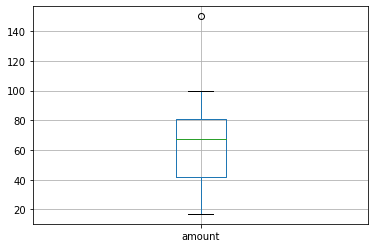

In [65]:
salary[['amount']].boxplot()

In [66]:
boxplot_range = (salary['amount'].quantile(0.75) - 1.5 * iqr, salary['amount'].quantile(0.25) + 1.5 * iqr)
boxplot_range

(22.5, 100.5)

In [67]:
outliers = salary.loc[(salary['amount'] < boxplot_range[0]) | (salary['amount'] > boxplot_range[1])]
outliers

,amount
9,17
19,150


Доля выбросов

In [69]:
outliers.shape[0]/salary.shape[0]

0.1

**Задача 3**

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?
Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

Всех "частей" студентов 4. 1/4 - А, 1/4 - В, 2/4 - С 

Найдем полную вероятность:

In [71]:
P = 1/4 * 0.8 + 1/4 * 0.7 + 2/4 * 0.9
P

0.825

In [72]:
P1 = (1/4 * 0.8) / P
P1

0.24242424242424246

In [73]:
P2 = (1/4 * 0.7) / P
P2

0.21212121212121213

In [74]:
P3 = (2/4 * 0.9) / P
P3

0.5454545454545455